# Atmosphere Phase Screen

Phase screens are computed with an `Atmosphere` and a `Source` object.
Lets import the `ceo` module first.

In [1]:
import math
import numpy as np
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The atmosphere is composed of a single layer at 10km.

In [2]:
atm = ceo.Atmosphere(0.15,30,altitude=10e3,wind_speed=10,wind_direction=0)

A V band on-axis source is defined first,

In [3]:
n = 64
src = ceo.Source("V",resolution=(n,n))

and an off-axis source at a zenith angle such as the chief rays of both source are separated by $D$ meter at 10km

In [4]:
D = 4.0
zen_oa = D/10e3
src_oa = ceo.Source("V",zenith=zen_oa,azimuth=0,resolution=(n,n))

In [5]:
tel  = ceo.Telescope(n,D)
src.masked(tel)
src_oa.masked(tel)

The $n \times n$ phase screens of $L=8$m width each are computed next

In [8]:
L = 8.0
p = L/(n-1)
atm.get_phase_screen(src,p,n,p,n,0.0)
atm.get_phase_screen(src_oa,p,n,p,n,0.0)

The two phase screens at 10km are plotted together

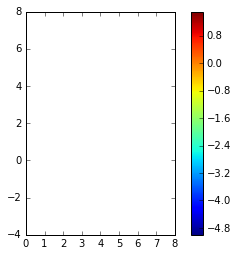

In [9]:
fig,ax = subplots()
img1 = ax.imshow(src.phase.host(units='micron'),aspect='equal',extent=[0,L,0,L])
img1.set_clim((-5,1.5))
hold(True)
img2 = ax.imshow(src_oa.phase.host(units='micron'),aspect='equal',extent=[0,L,-D,L-D])
img2.set_clim((-5,1.5))
ax.set_xlim(0,L)
ax.set_ylim(-D,L)
fig.colorbar(img2, ax=ax)

The sources can also be combined in a single `Source` object: 

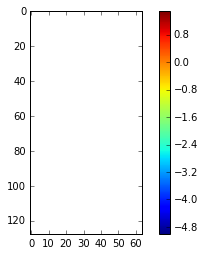

In [10]:
srcCombo = ceo.Source("V",zenith=[0,zen_oa],azimuth=[0,0],resolution=(n,n))
atm.get_phase_screen(srcCombo,p,n,p,n,0.0)
fig,ax = subplots()
img = ax.imshow(srcCombo.phase.host(units='micron'))
img.set_clim((-5,1.5))
fig.colorbar(img, ax=ax)